      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5104\2673711920.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  X_range = pd.DataFrame({'MEDV': range(int(X.min()), int(X.max())+1)})


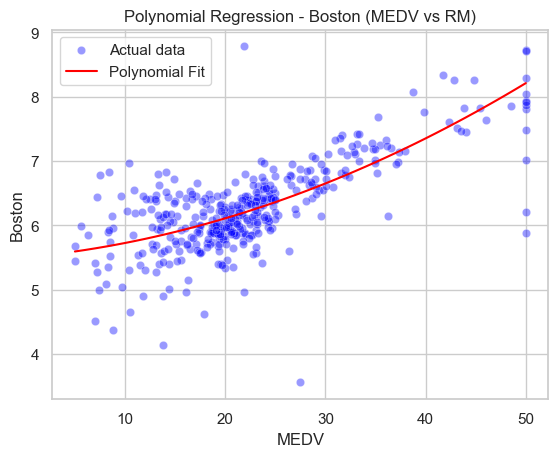

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("C:/Users/ASUS/Downloads/Boston housing dataset - Boston housing dataset.csv")
print(data.head())
print(data.shape)
print(data.info())
data.dropna(inplace=True)
data['MEDV'] = data['MEDV'].astype(float)
X = data[['MEDV']]
y = data['RM']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
X_range = pd.DataFrame({'MEDV': range(int(X.min()), int(X.max())+1)})
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
sns.set(style='whitegrid')
sns.scatterplot(x='MEDV', y='RM', data=data, label='Actual data', alpha=0.4,
color='blue')
sns.lineplot(x='MEDV', y=y_range_pred, data=X_range, label='Polynomial Fit',color='red')
plt.title("Polynomial Regression - Boston (MEDV vs RM)")
plt.xlabel("MEDV")
plt.ylabel("Boston")
plt.legend()
plt.show()